In [91]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import datetime as dt
from sklearn.cluster import OPTICS

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

In [92]:
data_features_for_ML = pd.read_csv("data_features_for_ML.cvs")
data_aggregated_for_the_group = pd.read_csv("data_aggregated_for_the_group.csv")
data_encoded_scaled = pd.read_csv("data_encoded_scaled.csv")

In [93]:
data_aggregated_for_the_group = data_aggregated_for_the_group.iloc[: , 1:]
data_aggregated_for_the_group.head()

,consumer_id,recency,frequency,quantity,age_group,gender,occupation,cat_Cleaning Supplies,cat_Drink,cat_Facecream,cat_Facewash,cat_Shampoo,cat_Skincare,cat_Soap,cat_Toiletry
0,1300016905,85.00,6,6,18 To 35,Male,Service Holder,2,0,0,0,1,1,2,0
1,1300019918,82.00,2,2,35+,Female,Housewife,0,1,0,0,0,0,0,1
2,1300028530,44.25,28,31,18 To 35,Male,Student,8,3,0,0,2,6,6,3
3,1300028697,42.00,4,4,35+,Male,Business,1,0,0,0,0,1,2,0
4,1300032742,23.00,2,2,18 To 35,Male,Business,1,0,0,0,0,0,1,0


In [94]:
data_features_for_ML = data_features_for_ML.iloc[: , 1:]
data_features_for_ML.head()

,recency,frequency
0,85.00,6
1,82.00,2
2,44.25,28
3,42.00,4
4,23.00,2


In [95]:
data_encoded_scaled = data_encoded_scaled.iloc[: , 1:]
data_encoded_scaled.head()

,0,1
0,1.518483,0.328043
1,1.398809,-0.524158
2,-0.107094,5.015151
3,-0.196850,-0.098058
4,-0.954787,-0.524158


# DBSCAN : Density-Based Spatial Clustering of Applications with Noise

Progress : - Understanding OK
- Plotting : OK
The understanding of Nneibhourg
http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/

- Better Plot : NOK (Shape and smaller)
- Get Better results : NOK
Try to change the espilon to a float (2.0 / 1.0)
https://towardsdatascience.com/dbscan-make-density-based-clusters-by-hand-2689dc335120
https://medium.com/@tarammullin/visualizing-dbscan-results-with-t-sne-plotly-e3742205c900
Making the Epsilon bigger (More than 2.0) turn out to have a memory error, without creating an acceptable cluster number (140)
SLowly we make it to acceptable Data : 
EPS = 1, Mint = 10, gives a 42 Cluster and 1200 noises. 
EPS = 1, Mint = 100, gives a 3 clusters and 17000 noises (Half of the Data base, but relevant clusters)
EPS = 1, Mint = 25, gives 22 clusters and 4400 noise points. 
EPS = 1, Mint = 15, gives 29 clusters 2000 noises
EPS = 1.1, MinT = 15, gives 6 clusters and 870 noises
EPS = 1.2, MinT = 15, gives 2 clusters and 673 noises
EPS = 1.1, MinT = 20, gives 3 clusters and 1286 noises
EPS = 1.1, Mint = 18, gives 7 clusters and 1126 noises
EPS = 1.1, Mint = 18, gives 5 clusters and 1224 noises

Which is weird for EPS has we previously plotted that the nneighbour should have been close to 0.3
Corrobore with the reachability plotted with Optics

- Optics : 
https://github.com/christianversloot/machine-learning-articles/blob/main/performing-optics-clustering-with-python-and-scikit-learn.md
https://stackoverflow.com/questions/10884822/optics-clustering-algorithm-how-to-get-the-best-epsilon
https://www.madrasresearch.org/post/optics-clustering
An other the way that calculate by itself the two parameters in DBSCAN.
Mint still ahve to be an educated guess while ESP is automatically calculated. Downside of this methode is on a large data set it's just slow af.

2 hours of running : Mint : 10, EPS : Non, Xi, minkowski
Estimated no. of clusters: 2368
Estimated no. of noise points: 27246

30 minutes running : Mint : 20, Max_Eps : 1.1, XI, minkowski
Estimated no. of clusters: 1836
Estimated no. of noise points: 31329

Decided to put an higher number of neighbours to 1000. Will reduce the clusters but will probably make higher noise 

Mint : 1000, EPS : 1.1
Estimated no. of clusters: 128
Estimated no. of noise points: 122859

Finally : And the last graph from Optics will be un supervised on the Data
Mint : 1000, EPS : None

- Interpret : NOK

Density-Based Spatial Clustering of Applications with Noise is good for three main cirterias : 
- Minimal domain knowledge to determine the input parameters (i.e. K in k-means and Dmin in hierarchical clustering)
- Discovery of clusters with arbitrary shapes
- Good efficiency on large databases
It makes the algorithm praticle and very easy to set up.
The algorithm works by delimiting the noise first, then reaching out for the points that are in the clusters until they are only surronded by noises. Repeating the task for every clusters.
Epsilon define the distance between two points, while samples represent the number of point that need to be near a center to be validated as a valid point.

https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc


In [96]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

#to not fuck up the data base : Test
X = data_features_for_ML.copy()

The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.10714286 0.35714286 ... 2.06630119 2.06630119 2.07142857]
 ...
 [0.         0.         0.         ... 1.         1.00498756 1.00498756]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.14285714 0.14285714 0.28571429]]
[[ 26743 104864  93264 ...  34465  78435  25616]
 [  6608  13179  12616 ...   5616   4579   3780]
 [     2 158325  41669 ...  62573 219693 111276]
 ...
 [122819  83945 160376 ...   4852  62074  61214]
 [ 17989  25830  23384 ...   8064  17127  19389]
 [328696 222995 354776 ... 181221 323137 172109]]


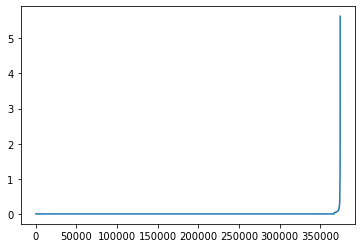

In [101]:
#We can calculate the distance from each point to its closest neighbour using the NearestNeighbors. 
#The point itself is included in n_neighbors. 
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

print('The kneighbors method returns two arrays, one which contains the distance to the closest n_neighbors points and the other which contains the index for each of those points.')
print(distances)
print(indices)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.margins(x=0.05, y=0.05)
# Try to zoom on the curve part but couldn't find a library for it.
# Realizing this is not an important issue as it's not going to show anything else
#Eps is between 0.2 and 0.3
plt.show()

Estimated number of clusters: 3
Estimated number of noise points: 1286


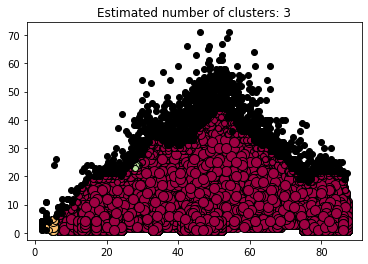

CPU times: total: 2min 52s
Wall time: 4min 29s


In [121]:
%%time
#Aptempt to DBSCAN
db = DBSCAN(eps=1.1, min_samples=20).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=10,
    )

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

#clusters = db.labels_
#colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
#vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

#plt.scatter(X.iloc[:,0], X.iloc[:,1], c=vectorizer(clusters))

#fig = plt.gcf()
#fig.savefig('test2png.png', dpi=100)

Optics : 
- OPTICS algorithm for clustering. Similar to the DBSCAN algorithm, but notably different, it can be used for clustering when the density of your clusters is different. This is something that DBSCAN cannot do so well.

Estimated no. of clusters: 2368
Estimated no. of noise points: 27246


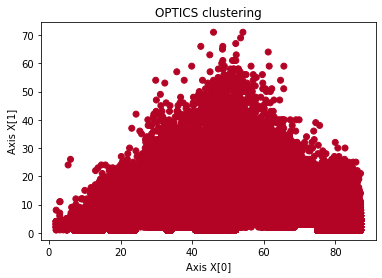

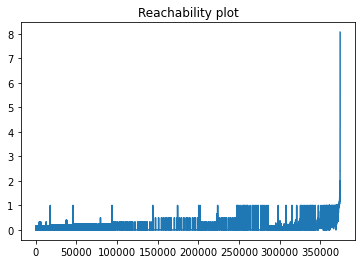

CPU times: total: 1h 51min 2s
Wall time: 1h 51min 5s


In [112]:
%%time
# Next stage : Definition of Espilon and Min sample
#Uses of Optics
num_classes = len(cluster_centers)
min_samples = 20
cluster_method = 'xi'
metric = 'minkowski'

db = OPTICS(min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

Estimated no. of clusters: 1836
Estimated no. of noise points: 31329


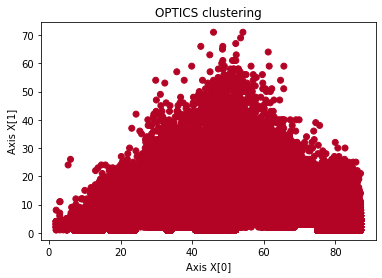

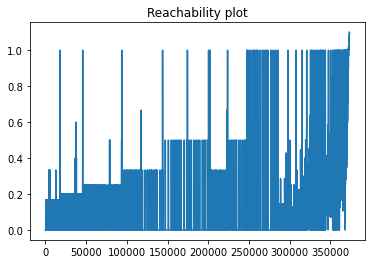

CPU times: total: 34min 48s
Wall time: 34min 48s


In [113]:
%%time
# Next stage : Definition of Espilon and Min sample
#Uses of Optics
num_classes = len(cluster_centers)
min_samples = 20
cluster_method = 'xi'
metric = 'minkowski'

db = OPTICS(max_eps=1.1, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

Estimated no. of clusters: 128
Estimated no. of noise points: 122859


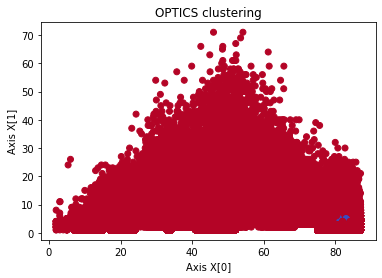

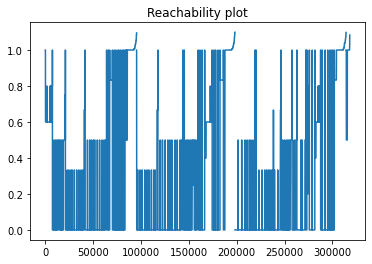

CPU times: total: 30min 43s
Wall time: 30min 44s


In [119]:
%%time
# Next stage : Definition of Espilon and Min sample
#Uses of Optics
num_classes = len(cluster_centers)
min_samples = 1000
cluster_method = 'xi'
metric = 'minkowski'

db = OPTICS(max_eps=1.1, min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()

In [ ]:
%%time
# Next stage : Definition of Espilon and Min sample
#Uses of Optics
num_classes = len(cluster_centers)
min_samples = 1000
cluster_method = 'xi'
metric = 'minkowski'

db = OPTICS(min_samples=min_samples, cluster_method=cluster_method, metric=metric).fit(X)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
plt.scatter(X.iloc[:,0], X.iloc[:,1], c=colors, marker="o", picker=True)
plt.title(f'OPTICS clustering')
plt.xlabel('Axis X[0]')
plt.ylabel('Axis X[1]')
plt.show()

reachability = db.reachability_[db.ordering_]
plt.plot(reachability)
plt.title('Reachability plot')
plt.show()